In [1]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import datetime
import Preprocessing_and_encoding as preprocess
import Helper as hp

ModuleNotFoundError: No module named 'Preprocessing_and_encoding'

In [4]:
user_list = []
no_of_users = 10
n = len(appliance_list)  # Number of appliances
# Input: granularity levels with ranges(d-levels)
domain = ['l10', 'l9', 'l8', 'l7', 'l6', 'l5', 'l4', 'l3', 'l2', 'l1']

applaince_energy_list = []
appliance_energy_dict = {}
# Tuning parameters
epsilon = 5  # 0 < ε ≤ 10
alpha = 10  # 4-10
window_size = 3
window_appliance_data = []
window_binary_array_data = []
user_appliance_list = {}
user_actual_value = {}
user_perturbed_data_list = {}
user_true_level_list = {}
user_perturbed_level_list = {}
appliance_level_list = {}
appliance_level_count = {}
appliance_level_average = {}
appliance_level_max = {}
appliance_perturbed_level_count = {}
appliance_perturbed_level_average = {}
appliance_perturbed_level_max = {}


In [158]:
no_of_users = 1000
# Input: granularity levels with ranges(d-levels)
appliance_list = appliance_list = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
                                   'A10', 'A11', 'A12', 'A13', 'A14', 'A15']
n = len(appliance_list) # Number of appliances
no_of_days = 30
no_of_appliances = 15
sensitivity = 2*n



# domain = ['l10', 'l9', 'l8', 'l7', 'l6', 'l5', 'l4', 'l3', 'l2', 'l1' ]
domain = ['l5', 'l4', 'l3', 'l2', 'l1' ]
# domain = ['l15', 'l14', 'l13', 'l12', 'l11','l10', 'l9', 'l8', 'l7', 'l6', 'l5', 'l4', 'l3', 'l2', 'l1' ]
# domain = ['l20', 'l19', 'l18', 'l17', 'l16', 'l15', 'l14', 'l13', 'l12', 'l11','l10', 'l9', 'l8', 'l7', 'l6', 'l5', 'l4', 'l3', 'l2', 'l1' ]

# range_levels = {
#   "l1": "0-10",
#   "l2": "10-30",
#   "l3": "30-60",
#   "l4": "60-100",
#   "l5": "100-200",
#   "l6": "200-300",
#   "l7": "300-500",
#   "l8": "500-800",
#   "l9": "800-1000",
#   "l10": "1000"
# }

range_levels = {
  "l1": "0-100",
  "l2": "100-300",
  "l3": "300-500",
  "l4": "500-1000",
  "l5": "1000",
  
}

# range_levels = {
#   "l1": "0-10",
#   "l2": "10-30",
#   "l3": "30-50",
#   "l4": "50-80",
#   "l5": "80-100",
#   "l6": "100-200",
#   "l7": "200-300",
#   "l8": "300-400",
#   "l9": "400-500",
#   "l10":"500-600",
#   "l11":"600-700",
#   "l12":"700-800",
#   "l13":"800-900",
#   "l14":"900-1000",
#   "l15":"1000"

# }

# range_levels = {
#   "l1": "0-10",
#   "l2": "10-20",
#   "l3": "20-50",
#   "l4": "50-70",
#   "l5": "70-90",
#   "l6": "90-110",
#   "l7": "110-150",
#   "l8": "150-200",
#   "l9": "200-250",
#   "l10":"250-300",
#   "l11":"300-350",
#   "l12":"350-400",
#   "l13":"400-450",
#   "l14":"450-500",
#   "l15":"500-600",
#   "l16":"600-700",
#   "l17":"700-800",
#   "l18":"800-900",
#   "l19":"900-1000", 
#   "l20":"1000"

# }


#Tuning parameters
epsilon = 10 # 0 < ε ≤ 10
# alpha = 10 # 4-10
window_size = 2
user_appliance_list = {}
user_actual_value = {}
user_perturbed_data_list = {}
user_true_level_list = {}
user_perturbed_level_list = {}
appliance_level_list = {}
appliance_level_count = {}
appliance_level_average = {}
appliance_level_max = {}
appliance_perturbed_level_count = {}
appliance_perturbed_level_average = {}
appliance_perturbed_level_max = {}

In [103]:
len(appliances[14])

30000

In [104]:
user_appliance_energy_dict_days = {}
count = 0
for k in range(1000):
    day_data = {}
    for i in range(30):
        appliances_data = {}
        for j in range(len(appliances)):
            appliances_data["A"+ str(j+1)] = appliances[j][count]
        count = count + 1
        day_data["day" + str(i + 1)] = appliances_data
    user_appliance_energy_dict_days["U" + str(k + 1)] = day_data


In [105]:
user_appliance_energy_dict_days['U1']

{'day1': {'A1': 29.77,
  'A2': 3.14,
  'A3': 0.0,
  'A4': 0.24,
  'A5': 11.97,
  'A6': 36.64,
  'A7': 0.24,
  'A8': 1.57,
  'A9': 20.52,
  'A10': 0.0,
  'A11': 6.81,
  'A12': 14.58,
  'A13': 3.11,
  'A14': 3.36,
  'A15': 8.23},
 'day2': {'A1': 2.24,
  'A2': 0.0,
  'A3': 0.0,
  'A4': 0.0,
  'A5': 0.0,
  'A6': 96.89,
  'A7': 0.0,
  'A8': 2.69,
  'A9': 24.22,
  'A10': 0.0,
  'A11': 0.0,
  'A12': 0.0,
  'A13': 3.79,
  'A14': 0.0,
  'A15': 0.17},
 'day3': {'A1': 0.0,
  'A2': 0.0,
  'A3': 0.0,
  'A4': 0.0,
  'A5': 0.0,
  'A6': 99.45,
  'A7': 0.0,
  'A8': 2.7,
  'A9': 27.9,
  'A10': 0.0,
  'A11': 0.0,
  'A12': 0.0,
  'A13': 3.63,
  'A14': 0.0,
  'A15': 2.45},
 'day4': {'A1': 0.0,
  'A2': 0.0,
  'A3': 0.0,
  'A4': 0.0,
  'A5': 0.0,
  'A6': 91.29,
  'A7': 0.0,
  'A8': 2.36,
  'A9': 28.02,
  'A10': 0.0,
  'A11': 0.0,
  'A12': 0.0,
  'A13': 0.0,
  'A14': 4.26,
  'A15': 5.23},
 'day5': {'A1': 0.0,
  'A2': 0.0,
  'A3': 0.0,
  'A4': 0.0,
  'A5': 0.0,
  'A6': 101.3,
  'A7': 0.0,
  'A8': 2.7,
  'A9': 

In [106]:
import Preprocessing_and_encoding as preprocess
import Budget_division as bd
import numpy as np
import random
import Helper as hp
import Synthesiser as sy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import collections
import Statistical_analysis as sa
import json
import Randomiser as rr

# LBU

In [33]:
for k in range(no_of_users):
      # Appliance_energy dictionary per day for 30 days. In appliance_energy_dict_days, key specifies the day
    # (day 1, 2, 3...), and value represents the dictionary of  appliances with their energy consumption for the day.
    window_appliance_data = []
    window_binary_array_data = []
    appliance_energy_dict_days = user_appliance_energy_dict_days['U' + str(k+1)]

    #Encode the energy data into energy levels (granularity levels)
    for key, value in appliance_energy_dict_days.items():
        true_energy_levels_dict = preprocess.create_appliance_energy_encoding(appliance_energy_dict_days[key], range_levels)
        # Declare, l = (d*n); // d- number of granular levels, n- number of appliances
        # Generate a long binary string B with the length of l by merging the binary arrays
        binary_array = []
        for i in range(len(true_energy_levels_dict)):
            binary_array.append(list(true_energy_levels_dict.values())[i])
        binary_array = np.array(binary_array).flatten()

        window_appliance_data.append(true_energy_levels_dict.values())
        window_binary_array_data.append(binary_array)

    perturbed_data_window_lbd = []
    perturbed_data_window_lba = []
    #LBD parameters
    previously_spent_epsilons = []
    previously_released = []
    published_epsilons_et2 = []
    #LBA parameters
    nullify = []
    window_iterate = 0
    actual_data = []
    current_timestamp = 0
    previously_spent_et2_lba = []

    perturbed_data_window_uniform = []
    perturbed_data_window_sampling = []
    # Adding the encoded data in a sliding window format for our calculation
    for window in hp.sliding_window(window_binary_array_data, window_size):
        current_window = window
        window_iterate = window_iterate + 1
        if window_iterate == 1:
            current_window = current_window
        else:
            a = current_window[window_size-1]
            current_window = []
            current_window.append(a.tolist())
            # previously_spent_et2.pop(0)
            # nullify.pop(0)

        actual_data.append(current_window)


        # Adaptive Budget division
        # Generate a random number to determine which sampling timestamp to select for use in the LDP sampling method.
        sampling_timestamp = random.randint(window_iterate, (window_iterate+window_size)-1)
        perturbed_data_sampling = []

        for i in range(len(current_window)):
            # LDP Budget uniform method
            uniform_epsilon = bd.uniform_budget(window_size)
            # Scenario2: Combined array with unary encoding
            perturbed_data_uniform = rr.optimised_unary_perturbation(current_window[i], sensitivity,
                                                                     epsilon=uniform_epsilon)
            perturbed_data_window_uniform.append(perturbed_data_uniform)

    user_perturbed_data_list['U' + str(k + 1)] = perturbed_data_window_uniform
    user_actual_value['U' + str(k + 1)] = window_binary_array_data

    day_data = {}
    # Appliances true energy levels
    for i in range(no_of_days):
        a = hp.true_data_appliance_level(user_actual_value['U' + str(k + 1)][i], len(domain), n)
        day_data["day" + str(i + 1)] = a
    user_true_level_list['U' + str(k + 1)] = day_data

    day_perturbed_data = {}
    # Appliances perturbed energy levels
    for i in range(no_of_days):
        b = hp.perturbed_data_appliance_level(user_perturbed_data_list['U' + str(k + 1)][i], len(domain), n)
        day_perturbed_data["day" + str(i + 1)] = b
    user_perturbed_level_list['U' + str(k + 1)] = day_perturbed_data

# LSP

In [38]:
for k in range(no_of_users):
      # Appliance_energy dictionary per day for 30 days. In appliance_energy_dict_days, key specifies the day
    # (day 1, 2, 3...), and value represents the dictionary of  appliances with their energy consumption for the day.
    window_appliance_data = []
    window_binary_array_data = []
    appliance_energy_dict_days = user_appliance_energy_dict_days['U' + str(k+1)]

    #Encode the energy data into energy levels (granularity levels)
    for key, value in appliance_energy_dict_days.items():
        true_energy_levels_dict = preprocess.create_appliance_energy_encoding(appliance_energy_dict_days[key], range_levels)
        # Declare, l = (d*n); // d- number of granular levels, n- number of appliances
        # Generate a long binary string B with the length of l by merging the binary arrays
        binary_array = []
        for i in range(len(true_energy_levels_dict)):
            binary_array.append(list(true_energy_levels_dict.values())[i])
        binary_array = np.array(binary_array).flatten()

        window_appliance_data.append(true_energy_levels_dict.values())
        window_binary_array_data.append(binary_array)

    perturbed_data_window_lbd = []
    perturbed_data_window_lba = []
    #LBD parameters
    previously_spent_epsilons = []
    previously_released = []
    published_epsilons_et2 = []
    #LBA parameters
    nullify = []
    window_iterate = 0
    actual_data = []
    current_timestamp = 0
    previously_spent_et2_lba = []

    perturbed_data_window_uniform = []
    perturbed_data_window_sampling = []
    # Adding the encoded data in a sliding window format for our calculation
    for window in hp.sliding_window(window_binary_array_data, window_size):
        current_window = window
        window_iterate = window_iterate + 1
        if window_iterate == 1:
            current_window = current_window
        else:
            a = current_window[window_size-1]
            # current_window = []
            # current_window.append(a.tolist())
            # previously_spent_et2.pop(0)
            # nullify.pop(0)

        actual_data.append(current_window)


        # Adaptive Budget division
        # Generate a random number to determine which sampling timestamp to select for use in the LDP sampling method.
        sampling_timestamp = random.randint(1, window_size)
        perturbed_data_sampling = []

        for i in range(len(current_window)):
            # LDP Sampling Method
            sampling_epsilon = bd.sampling_budget(sampling_timestamp, i + 1, epsilon)
            if (sampling_epsilon == 0):
                perturbed_data_sampling = perturbed_data_sampling
            else:
                # Scenario2: Combined array with unary encoding
                perturbed_data_sampling = rr.optimised_unary_perturbation(current_window[i], sensitivity,
                                                                          epsilon=sampling_epsilon)
        if window_iterate == 1:
            perturbed_data_window_sampling = [perturbed_data_sampling] * window_size
        else:
            perturbed_data_window_sampling.append(perturbed_data_sampling)


    user_perturbed_data_list['U' + str(k + 1)] = perturbed_data_window_sampling
    user_actual_value['U' + str(k + 1)] = window_binary_array_data

    day_data = {}
    # Appliances true energy levels
    for i in range(no_of_days):
        a = hp.true_data_appliance_level(user_actual_value['U' + str(k + 1)][i], len(domain), n)
        day_data["day" + str(i + 1)] = a
    user_true_level_list['U' + str(k + 1)] = day_data

    day_perturbed_data = {}
    # Appliances perturbed energy levels
    for i in range(no_of_days):
        b = hp.perturbed_data_appliance_level(user_perturbed_data_list['U' + str(k + 1)][i], len(domain), n)
        day_perturbed_data["day" + str(i + 1)] = b
    user_perturbed_level_list['U' + str(k + 1)] = day_perturbed_data

# LBD

In [159]:
for k in range(no_of_users):
      # Appliance_energy dictionary per day for 30 days. In appliance_energy_dict_days, key specifies the day
    # (day 1, 2, 3...), and value represents the dictionary of  appliances with their energy consumption for the day.
    window_appliance_data = []
    window_binary_array_data = []
    appliance_energy_dict_days = user_appliance_energy_dict_days['U' + str(k+1)]

    #Encode the energy data into energy levels (granularity levels)
    for key, value in appliance_energy_dict_days.items():
        true_energy_levels_dict = preprocess.create_appliance_energy_encoding(appliance_energy_dict_days[key], range_levels)
        # Declare, l = (d*n); // d- number of granular levels, n- number of appliances
        # Generate a long binary string B with the length of l by merging the binary arrays
        binary_array = []
        for i in range(len(true_energy_levels_dict)):
            binary_array.append(list(true_energy_levels_dict.values())[i])
        binary_array = np.array(binary_array).flatten()

        window_appliance_data.append(true_energy_levels_dict.values())
        window_binary_array_data.append(binary_array)

    perturbed_data_window_lbd = []
    perturbed_data_window_lba = []
    #LBD parameters
    previously_spent_epsilons = []
    previously_released = []
    published_epsilons_et2 = []
    #LBA parameters
    nullify = []
    window_iterate = 0
    actual_data = []
    current_timestamp = 0
    previously_spent_et2_lba = []
    # Adding the encoded data in a sliding window format for our calculation
    for window in hp.sliding_window(window_binary_array_data, window_size):
        current_window = window
        window_iterate = window_iterate + 1
        if window_iterate == 1:
            current_window = current_window
        else:
            a = current_window[window_size-1]
            current_window = []
            current_window.append(a.tolist())
            previously_spent_et2.pop(0)
            # nullify.pop(0)

        actual_data.append(current_window)

        # Adaptive Budget division
        # Generate a random number to determine which sampling timestamp to select for use in the LDP sampling method.
        sampling_timestamp = random.randint(window_iterate, (window_iterate+window_size)-1)
        perturbed_data_sampling = []

        for i in range(len(current_window)):

            # LDP Budget Distribution method
            perturbed_data_lbd, previously_spent_et2 = bd.local_budget_distribution(window_size, current_window[i],
                                                                                     previously_spent_epsilons, published_epsilons_et2,
                                                                                     previously_released, sensitivity, epsilon)
            perturbed_data_window_lbd.append(perturbed_data_lbd)
            previously_released = perturbed_data_lbd

    user_perturbed_data_list['U' + str(k+1) ] = perturbed_data_window_lbd
    user_actual_value['U' + str(k+1)] = window_binary_array_data

    day_data ={}
    #Appliances true energy levels
    for i in range (no_of_days):
        a = hp.true_data_appliance_level(user_actual_value['U' + str(k+1) ][i], len(domain), n)
        day_data["day" + str(i + 1)] = a
    user_true_level_list['U' + str(k+1)] = day_data

    day_perturbed_data = {}
    #Appliances perturbed energy levels
    for i in range(no_of_days):
        b = hp.perturbed_data_appliance_level(user_perturbed_data_list['U' + str(k+1) ][i], len(domain), n)
        day_perturbed_data["day" + str(i + 1)] = b
    user_perturbed_level_list['U' + str(k+1)] = day_perturbed_data



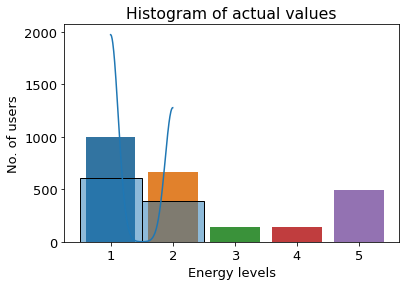

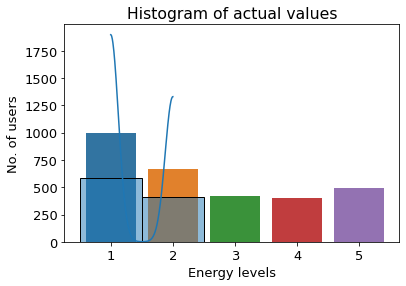

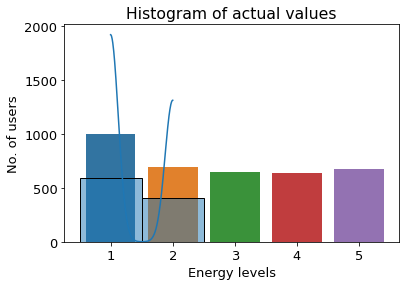

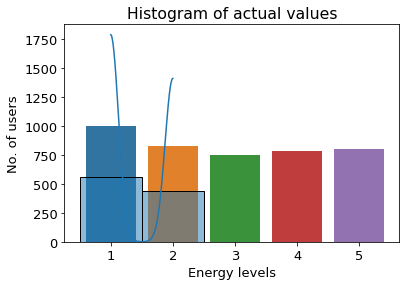

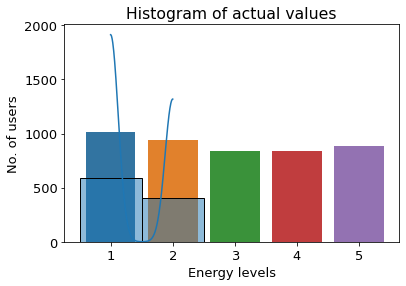

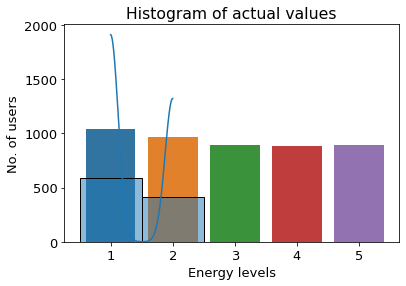

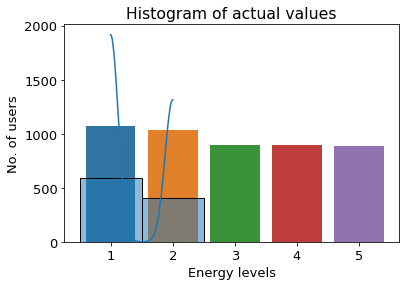

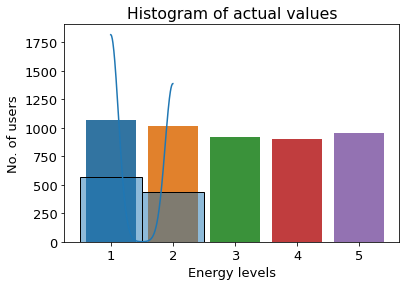

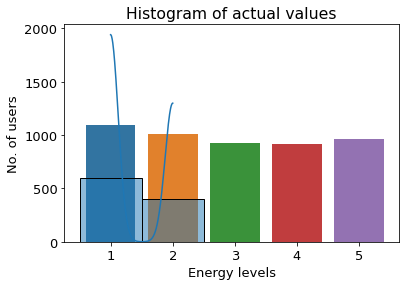

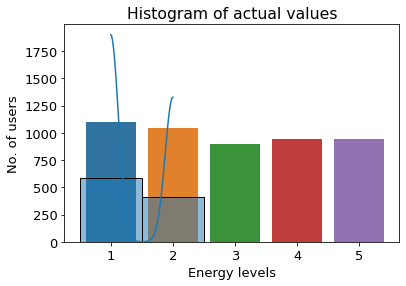

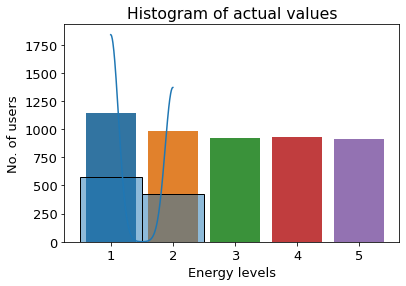

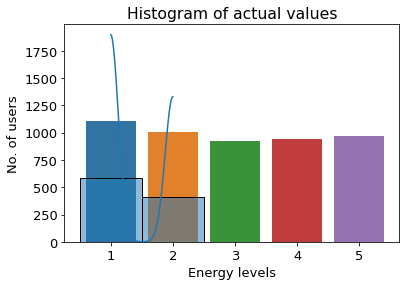

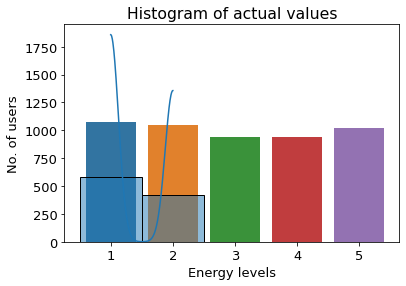

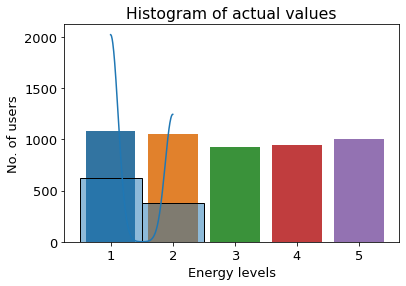

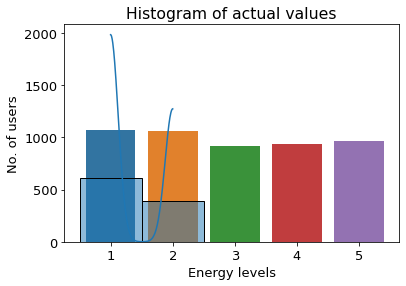

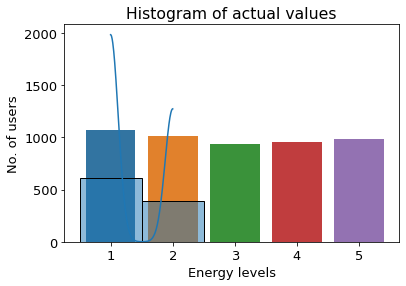

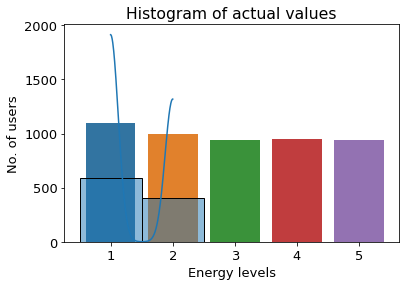

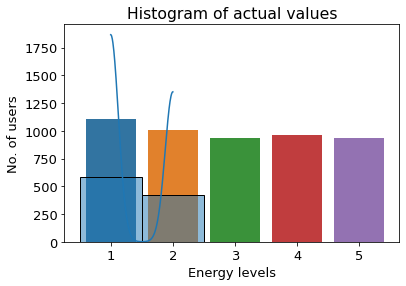

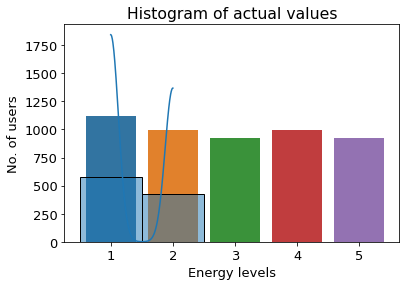

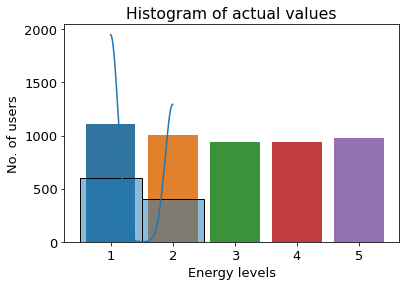

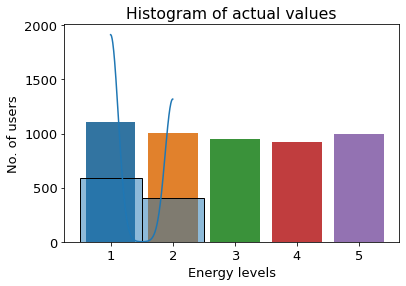

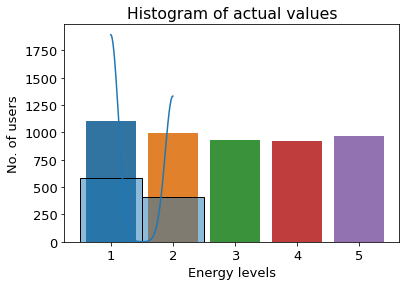

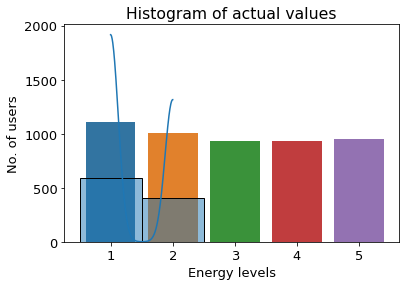

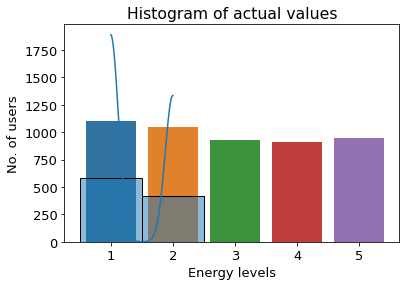

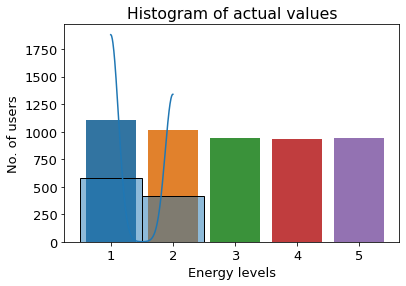

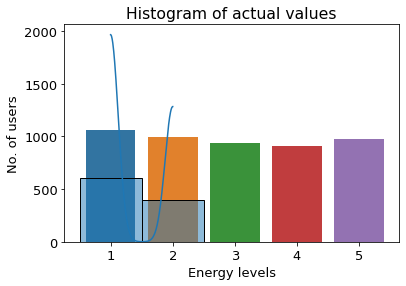

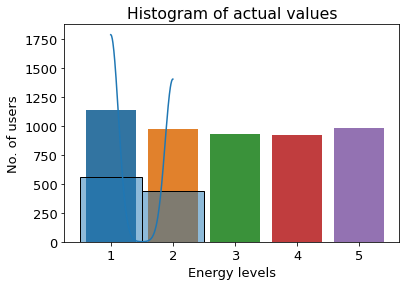

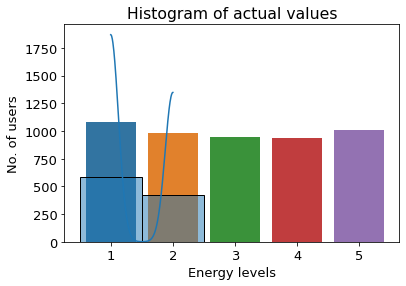

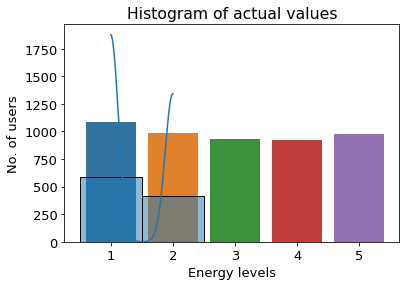

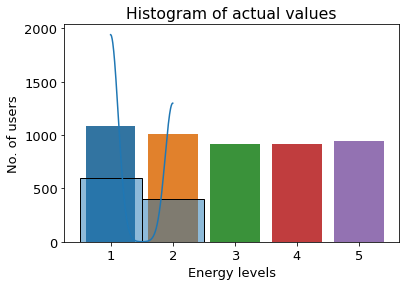

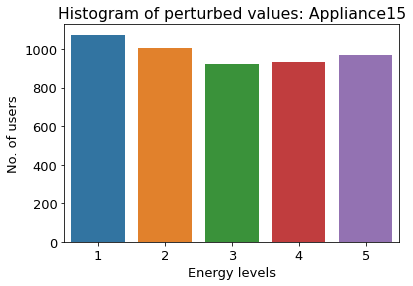

In [160]:
final_output = {}
#For true value aggregation and level mapping
for w in range(no_of_days):
    for i in range(n):
        all_user_appliance_true_values = []
        for j in range(no_of_users):
            appliance_data = user_true_level_list['U' + str(j+1)]['day' + str(w+1)]['A' + str(i+1)]
            all_user_appliance_true_values.append(appliance_data)
        levels =  hp.frequency_estimation_true_value(all_user_appliance_true_values, domain)
        counter = collections.Counter(levels)
        appliance_level_list['A' + str(i + 1)] = levels
        appliance_level_count['A' + str(i + 1)] = counter
        appliance_level_count = {k: dict(v) for k, v in appliance_level_count.items()}
        # Calculating average energy consumption: True value
        appliance_average, max_value = hp.average_calculation(counter, range_levels, domain)
        appliance_level_average['A' + str(i + 1)] = appliance_average
        appliance_level_max['A' + str(i + 1)] = max_value


    appliance_level_count_full = {}
    for j in range(len(appliance_level_count)):
        level_dic = {}
        diff = list(set(domain).symmetric_difference(set(list(list(appliance_level_count.values())[j].keys()))))
        for k in range(len(list(list(appliance_level_count.values())[j].keys()))):
            level_dic[int(list(list(appliance_level_count.values())[j].keys())[k].replace('l', ''))] \
                = list(list(appliance_level_count.values())[j].values())[k]
        for i in range(len(diff)):
            level_dic[int(diff[i].replace('l', ''))] = 0
        level_dic = OrderedDict(sorted(level_dic.items()))
        
        title_actual = 'Histogram of actual values: Appliance' + str(j+1)

        ax = sns.barplot(x=list(level_dic.keys()), y=list(level_dic.values()))
        ax.set(xlabel='Energy levels', ylabel='No. of users', title=title_actual)
        saveTitle = 'results/real/lbd/plotAcl5 ' + str(w)+ ' '+ str(i+1) +'.pdf'
        plt.savefig(saveTitle)

        appliance_level_count_full['A' + str(j + 1)] = level_dic

    # Plotting the histogram: true values    
    ax = sns.histplot(data = appliance_level_list['A1'], kde=True)
    ax.set(xlabel='Energy levels', ylabel='No. of users', title='Histogram of actual values')
    plt.show()

    #For perturbed value aggregation
    for i in range (n):
        all_user_appliance_perturbed_values = []
        for j in range (no_of_users):
            appliance_data = user_perturbed_level_list['U' + str(j+1)]['day' + str(w+1)]['A' + str(i+1) ]
            all_user_appliance_perturbed_values.append(appliance_data)
        # Estimation and aggregation
        estimated_answers = hp.estimation_from_perturbed_value(all_user_appliance_perturbed_values, sensitivity, epsilon)
        levels_with_count = dict(zip(domain, estimated_answers))
        res = OrderedDict(reversed(list(levels_with_count.items())))
        res_new = {}
        for j in range(len(list(res.keys()))):
            res_new[j + 1] = list(res.values())[j]
        appliance_perturbed_level_count['A' + str(i + 1)] = res_new
        
        # Plotting the histogram: perturbed values
        title_perturbed = 'Histogram of perturbed values: Appliance' + str(i+1)
        ax = sns.barplot(x=list(res_new.keys()), y=list(res_new.values()))
        ax.set(xlabel='Energy levels', ylabel='No. of users', title=title_perturbed)
        savepTitle = 'results/real/lbd/plotPerl5 ' + str(w)+ ' '+ str(i+1) +'.pdf'
        plt.savefig(savepTitle)

    output_appliance = {}
    
# Statistical analysis I: mean/variance analysis
    for k in range(len(appliance_list)):
        
        overall_values = {}
        a = appliance_level_count_full['A' + str(k+1)]
        temp_actual = list(a.keys())
        count_actual = list(a.values())
        final_actual_data = []

        for i in range(len(temp_actual)):
            for j in range (count_actual[i]):
                final_actual_data.append(temp_actual[i])

        b = appliance_perturbed_level_count['A' + str(k+1)]
        temp = list(b.keys())
        counte = list(b.values())
        final_perturbed_data = []

        for i in range(len(temp)):
            for j in range (counte[i]):
                final_perturbed_data.append(temp[i])

        mean_actual = sum(final_actual_data) / len(final_actual_data)
        variance_actual = sum((i - mean_actual) ** 2 for i in final_actual_data) / len(final_actual_data)

        mean = sum(final_perturbed_data) / len(final_perturbed_data)
        variance = sum((i - mean) ** 2 for i in final_perturbed_data) / len(final_perturbed_data)


        kw_stat, kw_pval = sa.kruskal_wallis_test(count_actual, counte)
#         overall_values['mean_actual'] = mean_actual
        # overall_values['variance_actual'] = variance_actual
#         overall_values['final_actual_data'] = final_actual_data
#         overall_values['final_perturbed_data'] = final_perturbed_data
        overall_values['kw_pval'] = kw_pval

        output_appliance['A' + str(k + 1)] = overall_values

    final_output['D' + str(w + 1)] = output_appliance

with open('convert_real_lbdl5.txt', 'w') as convert_file:
    convert_file.write(json.dumps(final_output))

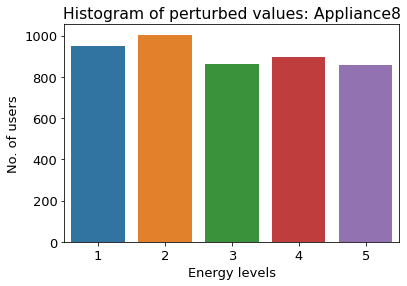

In [175]:
title_perturbed = 'Histogram of perturbed values: Appliance' + str(11)
ax = sns.barplot(x=list(appliance_perturbed_level_count['A11'].keys()), y=list(appliance_perturbed_level_count['A11'].values()))
ax.set(xlabel='Energy levels', ylabel='No. of users', title=title_perturbed)
savepTitle = 'results/real/lbd/plotPerl5 ' + str(8) +'.pdf'
plt.show()

# appliance_perturbed_level_count['A1']

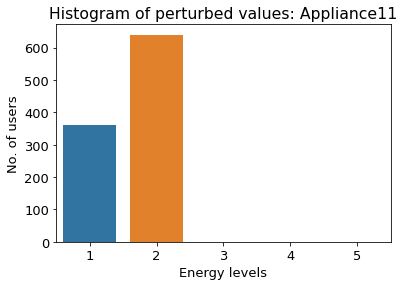

In [190]:
title_perturbed = 'Histogram of perturbed values: Appliance' + str(11)
ax = sns.barplot(x=list(appliance_level_count_full['A11'].keys()), y=list(appliance_level_count_full['A11'].values()))
ax.set(xlabel='Energy levels', ylabel='No. of users', title=title_perturbed)
savepTitle = 'results/real/lbd/plotPerl5 ' + str(8) +'.pdf'
plt.show()


In [194]:
appliance_level_count_full['A15']

OrderedDict([(1, 1000), (2, 0), (3, 0), (4, 0), (5, 0)])

# LBA

In [44]:
#LBA
# Calculating the perturbed values for every user seperately
for k in range(no_of_users):
      # Appliance_energy dictionary per day for 30 days. In appliance_energy_dict_days, key specifies the day
    # (day 1, 2, 3...), and value represents the dictionary of  appliances with their energy consumption for the day.
    window_appliance_data = []
    window_binary_array_data = []
    appliance_energy_dict_days = user_appliance_energy_dict_days['U' + str(k+1)]

    #Encode the energy data into energy levels (granularity levels)
    for key, value in appliance_energy_dict_days.items():
        true_energy_levels_dict = preprocess.create_appliance_energy_encoding(appliance_energy_dict_days[key], range_levels)
        # Declare, l = (d*n); // d- number of granular levels, n- number of appliances
        # Generate a long binary string B with the length of l by merging the binary arrays
        binary_array = []
        for i in range(len(true_energy_levels_dict)):
            binary_array.append(list(true_energy_levels_dict.values())[i])
        binary_array = np.array(binary_array).flatten()

        window_appliance_data.append(true_energy_levels_dict.values())
        window_binary_array_data.append(binary_array)

    perturbed_data_window_lbd = []
    perturbed_data_window_lba = []
    #LBD parameters
    previously_spent_epsilons = []
    previously_released = []
    published_epsilons_et2 = []
    #LBA parameters
    nullify = []
    window_iterate = 0
    actual_data = []
    current_timestamp = 0
    previously_spent_et2_lba = []
    # Adding the encoded data in a sliding window format for our calculation
    for window in hp.sliding_window(window_binary_array_data, window_size):
        current_window = window
        window_iterate = window_iterate + 1
        if window_iterate == 1:
            current_window = current_window
        else:
            a = current_window[window_size-1]
            current_window = []
            current_window.append(a.tolist())
            # previously_spent_et2.pop(0)
            # nullify.pop(0)

        actual_data.append(current_window)
        # Adaptive Budget division
        for i in range(len(current_window)):
            # LDP Budget Absorption method
            perturbed_data_lba, previously_spent_et2_lba, nullify = bd.local_budget_absorption(window_size, current_window[i],
                                                                                    previously_spent_epsilons,
                                                                                    previously_spent_et2_lba,
                                                                                    previously_released, current_timestamp, 
                                                                                               nullify, sensitivity, epsilon)

            perturbed_data_window_lba.append(perturbed_data_lba)
            previously_released = perturbed_data_lba
            current_timestamp = current_timestamp + 1

    user_perturbed_data_list['U' + str(k+1) ] = perturbed_data_window_lba
    user_actual_value['U' + str(k+1)] = window_binary_array_data

    day_data ={}
    #Appliances true energy levels
    for i in range (no_of_days):
        a = hp.true_data_appliance_level(user_actual_value['U' + str(k+1) ][i], len(domain), n)
        day_data["day" + str(i + 1)] = a
    user_true_level_list['U' + str(k+1)] = day_data

    day_perturbed_data = {}
    #Appliances perturbed energy levels
    for i in range(no_of_days):
        b = hp.perturbed_data_appliance_level(user_perturbed_data_list['U' + str(k+1) ][i], len(domain), n)
        day_perturbed_data["day" + str(i + 1)] = b
    user_perturbed_level_list['U' + str(k+1)] = day_perturbed_data

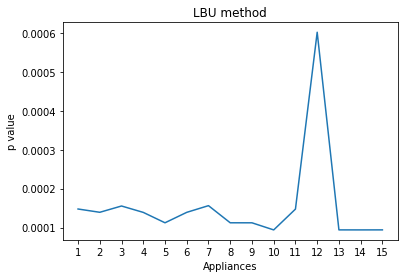

In [37]:
avg_pvalue_lbu = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbu.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbu)
ax.set(xlabel='Appliances', ylabel='p value', title='LBU method')
plt.savefig('realLBU.pdf')

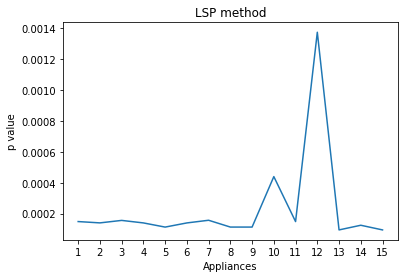

In [40]:
avg_pvalue_lsp = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lsp.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lsp)
ax.set(xlabel='Appliances', ylabel='p value', title='LSP method')
plt.savefig('realLSP.pdf')

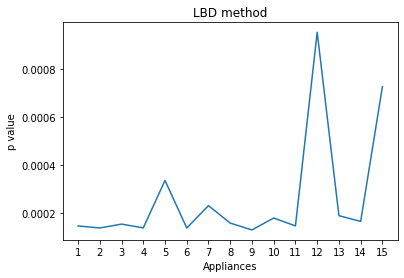

In [43]:
avg_pvalue_lbd = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbd.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbd)
ax.set(xlabel='Appliances', ylabel='p value', title='LBD method')
plt.savefig('realLBD.pdf')

# window size

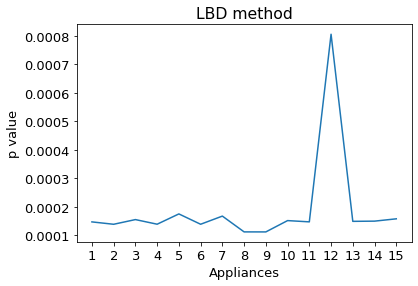

In [110]:
avg_pvalue_lbd_w3 = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbd_w3.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbd_w3)
ax.set(xlabel='Appliances', ylabel='p value', title='LBD method')
plt.show()
# plt.savefig('realLBD.pdf')

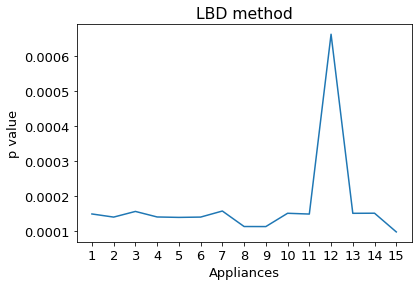

In [114]:
avg_pvalue_lbd_w4 = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbd_w4.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbd_w4)
ax.set(xlabel='Appliances', ylabel='p value', title='LBD method')
plt.show()
# plt.savefig('realLBD.pdf')

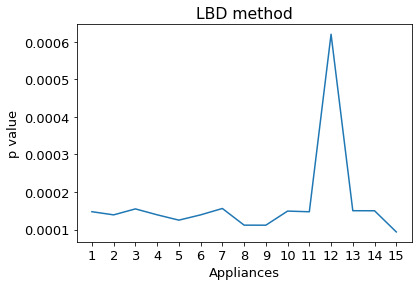

In [118]:
avg_pvalue_lbd_w5 = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbd_w5.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbd_w5)
ax.set(xlabel='Appliances', ylabel='p value', title='LBD method')
plt.show()
# plt.savefig('realLBD.pdf')

# epsilon


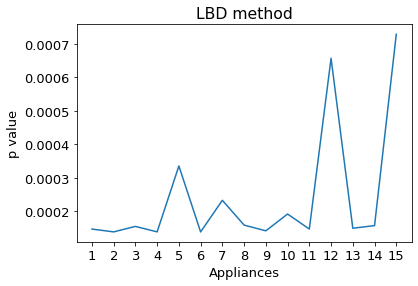

In [125]:
avg_pvalue_lbd_e5 = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbd_e5.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbd_e5)
ax.set(xlabel='Appliances', ylabel='p value', title='LBD method')
plt.show()
# plt.savefig('realLBD.pdf')

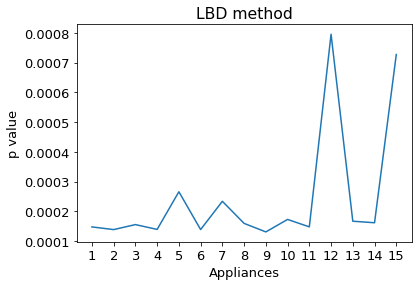

In [129]:
avg_pvalue_lbd_e7 = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbd_e7.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbd_e7)
ax.set(xlabel='Appliances', ylabel='p value', title='LBD method')
plt.show()
# plt.savefig('realLBD.pdf')

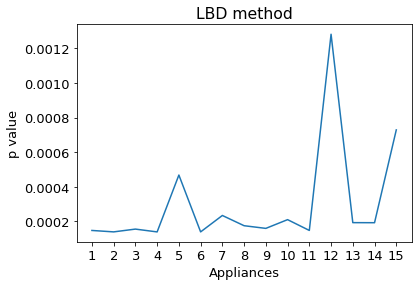

In [133]:
avg_pvalue_lbd_e15 = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbd_e15.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbd_e15)
ax.set(xlabel='Appliances', ylabel='p value', title='LBD method')
plt.show()
# plt.savefig('realLBD.pdf')

# No of levels

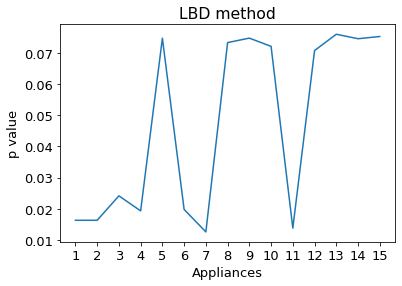

In [161]:
avg_pvalue_lbd_l5 = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbd_l5.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbd_l5)
ax.set(xlabel='Appliances', ylabel='p value', title='LBD method')
plt.show()
# plt.savefig('realLBD.pdf')

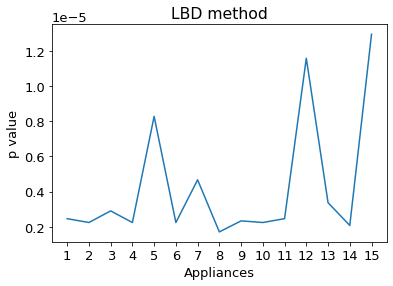

In [149]:
avg_pvalue_lbd_l15 = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbd_l15.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbd_l15)
ax.set(xlabel='Appliances', ylabel='p value', title='LBD method')
plt.show()
# plt.savefig('realLBD.pdf')

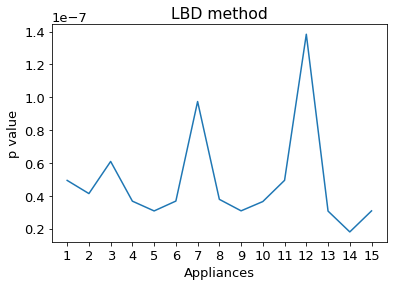

In [153]:
avg_pvalue_lbd_20 = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lbd_20.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lbd_20)
ax.set(xlabel='Appliances', ylabel='p value', title='LBD method')
plt.show()
# plt.savefig('realLBD.pdf')

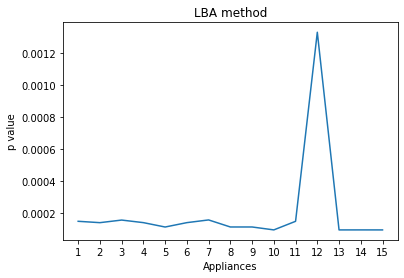

In [46]:
avg_pvalue_lba = []
for i in range (no_of_appliances):
    sum_val = 0
    for k in range (no_of_days):
        sum_val = sum_val + final_output['D' + str(k + 1)]['A' + str(i+1)]['kw_pval']
    avg = sum_val/no_of_days
    avg_pvalue_lba.append(avg)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
ax = sns.lineplot(x=x, y=avg_pvalue_lba)
ax.set(xlabel='Appliances', ylabel='p value', title='LBA method')
plt.savefig('realLBA.pdf')

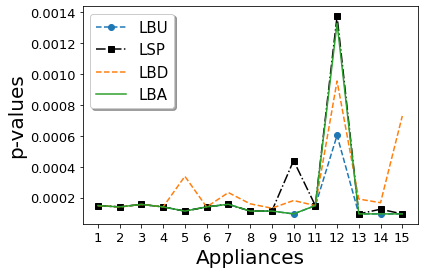

In [119]:
# For method comparion
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import numpy as np
plt.rcParams.update({'font.size': 13})

fig, ax = plt.subplots()

l1, = ax.plot(x, avg_pvalue_lbu, '--o')
l2, = ax.plot(x, avg_pvalue_lsp, 's-.', color= 'black')
l3, = ax.plot(x, avg_pvalue_lbd, '--')
l4, = ax.plot(x, avg_pvalue_lba)

# l2, l3 = ax.plot(t2, np.sin(2 * np.pi * t2), '--o', t1, np.log(1 + t1), '.')
# l4, = ax.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 's-.')

ax.legend((l1, l2, l3, l4), ('LBU', 'LSP', 'LBD', 'LBA'), loc='upper left', fontsize=15, shadow=True)
ax.set_xlabel('Appliances', fontsize=20)
ax.set_ylabel('p-values', fontsize=20)
# ax.set_title('The Kruskal-Wallis similarty test p values for each appliances', fontsize=14)
# plt.show()
plt.savefig('real_methods.pdf',dpi=300, bbox_inches = "tight")
# plt.savefig('real_methods.pdf')

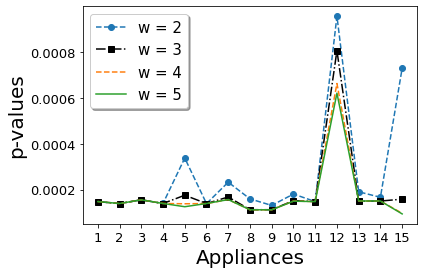

In [120]:
# For window size comparion
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import numpy as np
plt.rcParams.update({'font.size': 13})

fig, ax = plt.subplots()

l1, = ax.plot(x, avg_pvalue_lbd, '--o')
l2, = ax.plot(x, avg_pvalue_lbd_w3, 's-.', color= 'black')
l3, = ax.plot(x, avg_pvalue_lbd_w4, '--')
l4, = ax.plot(x, avg_pvalue_lbd_w5)

# l2, l3 = ax.plot(t2, np.sin(2 * np.pi * t2), '--o', t1, np.log(1 + t1), '.')
# l4, = ax.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 's-.')

ax.legend((l1, l2, l3, l4), ('w = 2', 'w = 3', 'w = 4', 'w = 5'), loc='upper left', fontsize=15, shadow=True)
ax.set_xlabel('Appliances', fontsize=20)
ax.set_ylabel('p-values', fontsize=20)
# ax.set_title('The Kruskal-Wallis similarty test p values for each appliances', fontsize=14)
# plt.show()
plt.savefig('real_window.pdf',dpi=300, bbox_inches = "tight")
# plt.savefig('real_methods.pdf')

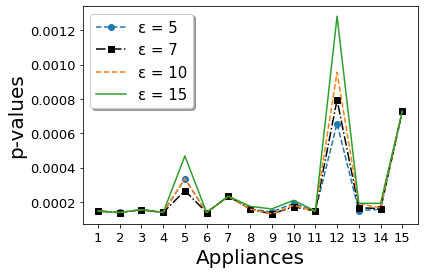

In [195]:
# For epsilon value comparion
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import numpy as np
plt.rcParams.update({'font.size': 13})

fig, ax = plt.subplots()

l1, = ax.plot(x, avg_pvalue_lbd_e5, '--o')
l2, = ax.plot(x, avg_pvalue_lbd_e7, 's-.', color= 'black')
l3, = ax.plot(x, avg_pvalue_lbd, '--')
l4, = ax.plot(x, avg_pvalue_lbd_e15)

# l2, l3 = ax.plot(t2, np.sin(2 * np.pi * t2), '--o', t1, np.log(1 + t1), '.')
# l4, = ax.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 's-.')

ax.legend((l1, l2, l3, l4), ('ε = 5', 'ε = 7', 'ε = 10', 'ε = 15'), loc='upper left', fontsize=15, shadow=True)
ax.set_xlabel('Appliances', fontsize=20)
ax.set_ylabel('p-values', fontsize=20)
# ax.set_title('The Kruskal-Wallis similarty test p values for each appliances', fontsize=14)
# plt.show()
plt.savefig('real_epsilon.pdf',dpi=300, bbox_inches = "tight")
# plt.savefig('real_methods.pdf')

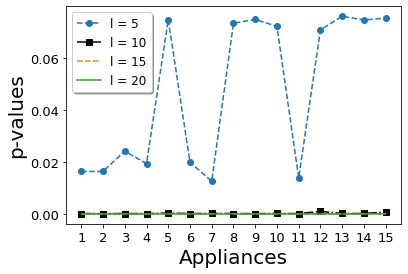

In [196]:
# For level value comparion
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import numpy as np
plt.rcParams.update({'font.size': 13})

fig, ax = plt.subplots()

l1, = ax.plot(x, avg_pvalue_lbd_l5, '--o')
l2, = ax.plot(x, avg_pvalue_lbd, 's-.', color= 'black')
l3, = ax.plot(x, avg_pvalue_lbd_l15, '--')
l4, = ax.plot(x, avg_pvalue_lbd_20)

# l2, l3 = ax.plot(t2, np.sin(2 * np.pi * t2), '--o', t1, np.log(1 + t1), '.')
# l4, = ax.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 's-.')

ax.legend((l1, l2, l3, l4), ('l = 5', 'l = 10', 'l = 15', 'l = 20'), loc='upper left', fontsize=12, shadow=True)
ax.set_xlabel('Appliances', fontsize=20)
ax.set_ylabel('p-values', fontsize=20)
# ax.set_title('The Kruskal-Wallis similarty test p values for each appliances', fontsize=14)
# plt.show()
plt.savefig('real_level.pdf',dpi=300, bbox_inches = "tight")
# plt.savefig('real_methods.pdf')

In [136]:
lbu_a = np.average(avg_pvalue_lbd_e5)
lbd_a = np.average(avg_pvalue_lbd_e7)
lsp_a = np.average(avg_pvalue_lbd)
lba_a = np.average(avg_pvalue_lbd_e15)
print(lbu_a, lsp_a, lbd_a, lba_a)

0.00024160581276721889 0.00026319374264208503 0.00024541348122262554 0.00030065515407292064
